# Modelagem 3D de uma bacia sedimentar

## Importando bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import verde as vd
import pyproj
import boule as bl
import harmonica as hm

In [2]:
notebook_name = '1. Basin_3d_modeling'

### Carregando os dados

In [3]:
fname = 'data_set/basement_example.gdf'

In [4]:
data = hm.load_icgem_gdf(fname)

In [5]:
data['basement_relief'] = -(data['topography_shm'] - data['topography_shm'].min())

In [6]:
basement = data.basement_relief.values

### Informações sobre a região e os dados

In [7]:
region = (-44,-42,-22, -20)
spacing = 0.01

In [8]:
longitude,latitude = vd.grid_coordinates(region=region, spacing=spacing)

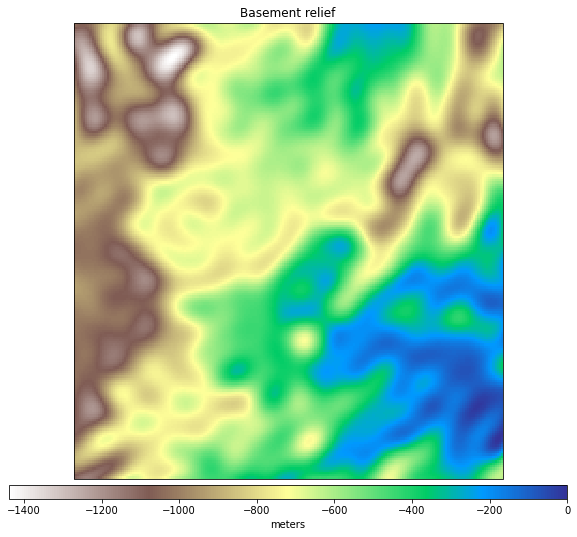

In [9]:
plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.Mercator())
pg = data.basement_relief.plot.pcolormesh(ax=ax, cmap="terrain_r", add_colorbar=False, transform=ccrs.PlateCarree())
plt.colorbar(pg, ax=ax, orientation="horizontal", pad=0.01, aspect=40, label="meters",shrink=1.)
ax.set_title("Basement relief")
ax.set_extent(region,crs=ccrs.PlateCarree())

file_name = 'images/basement3D_map'
plt.savefig(file_name+'.png',dpi=300)

plt.show()

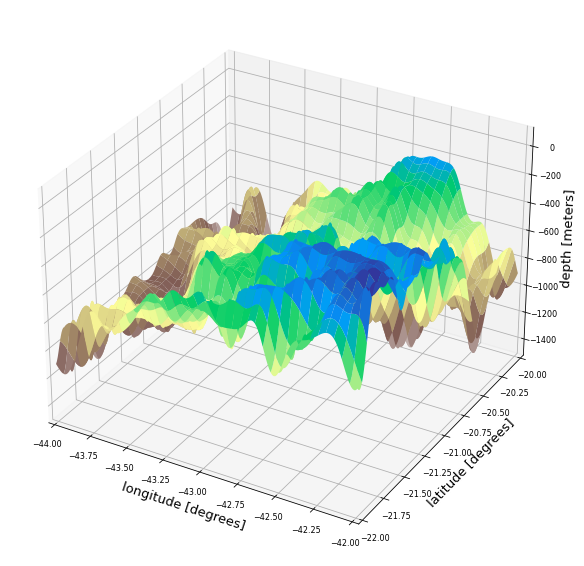

In [10]:
title_font = 18
bottom_font = 15
ticks_font = 13
fig = plt.figure(figsize=(8,8), tight_layout=True)
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(longitude,latitude, basement, cmap='terrain_r')

## setting range for axes
ax.set_xlim(longitude.min(), longitude.max()) 
ax.set_ylim(latitude.min(), latitude.max())
ax.set_zlim(basement.min() - 50., 100)

## setting label for axes (x-, y- and z-axes pointing to north, east and downward, respectively)
ax.set_xlabel('longitude [degrees]',fontsize = ticks_font)
ax.set_ylabel('latitude [degrees]',fontsize = ticks_font)
ax.set_zlabel('depth [meters]',fontsize = ticks_font)
ax.tick_params(labelsize=8)

file_name = 'images/basement3D_triplot'
plt.savefig(file_name+'.png',dpi=300)

plt.show()

## Calculando o efeito gravitacional do embasamento

In [11]:
projection = pyproj.Proj(proj="merc", lat_ts=latitude.mean())
easting,northing = projection(longitude,latitude)

In [12]:
region = vd.get_region((easting,northing))

In [13]:
easting,northing,height = vd.grid_coordinates(region,shape=(201,201),extra_coords=100)

In [14]:
density = -300*np.ones_like(basement)

In [15]:
prisms = hm.prism_layer(
    coordinates=(easting,northing),
    surface=basement,
    reference=0,
    properties={"density": density},)

In [16]:
gravity = prisms.prism_layer.gravity((easting,northing,height), field="g_z")

/home/andrelreis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


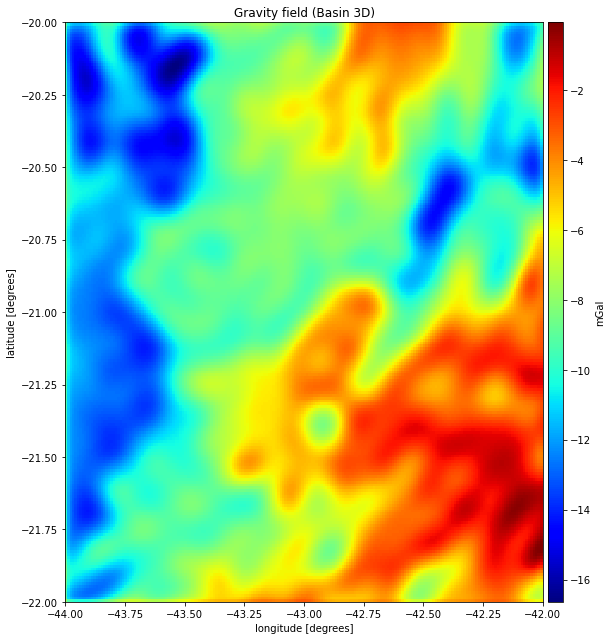

In [17]:
plt.figure(figsize=(9, 9))
plt.title("Gravity field (Basin 3D)")
plt.pcolormesh(longitude,latitude, gravity,cmap='jet')
plt.colorbar(label="mGal", pad=0.01, aspect=40,shrink=1.)
plt.xlabel("longitude [degrees]")
plt.ylabel("latitude [degrees]")
plt.tight_layout()

file_name = 'images/basement3D_grav'
plt.savefig(file_name+'.png',dpi=300)

plt.show()